In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score  
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
import pickle
from xgboost import XGBClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.preprocessing import LabelEncoder

rela_embedding = pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/KRAL_Embedding_Model_AVILA_D016-rela.csv')
tail_embedding=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/KRAL_Embedding_Model_AVILA_D016-tail.csv')

x_test = pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila_x_test.csv')
y_test=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/y_test_avila.csv').drop(['Unnamed: 0'],axis=1)

train_y=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/tabel_train_y.csv')
val_y=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/tabel_val_y.csv')

map_char_toint = {char: i for i, char in enumerate(sorted(y_test['LABEL'].unique().tolist()))}
y_test['LABEL'] = y_test['LABEL'].replace(map_char_toint)
train_y['0'] = train_y['0'].replace(map_char_toint)
val_y['0'] = val_y['0'].replace(map_char_toint)
print(val_y['0'].unique())
print(train_y['0'].unique())


[ 0  6  3  5  9 11  8  4 10  7  2  1]
[10  0  5 11  4  7  8  2  6  3  9  1]


In [4]:
train_data=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/tabel_train_data.csv')
val_data=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/tabel_val_data.csv')

/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


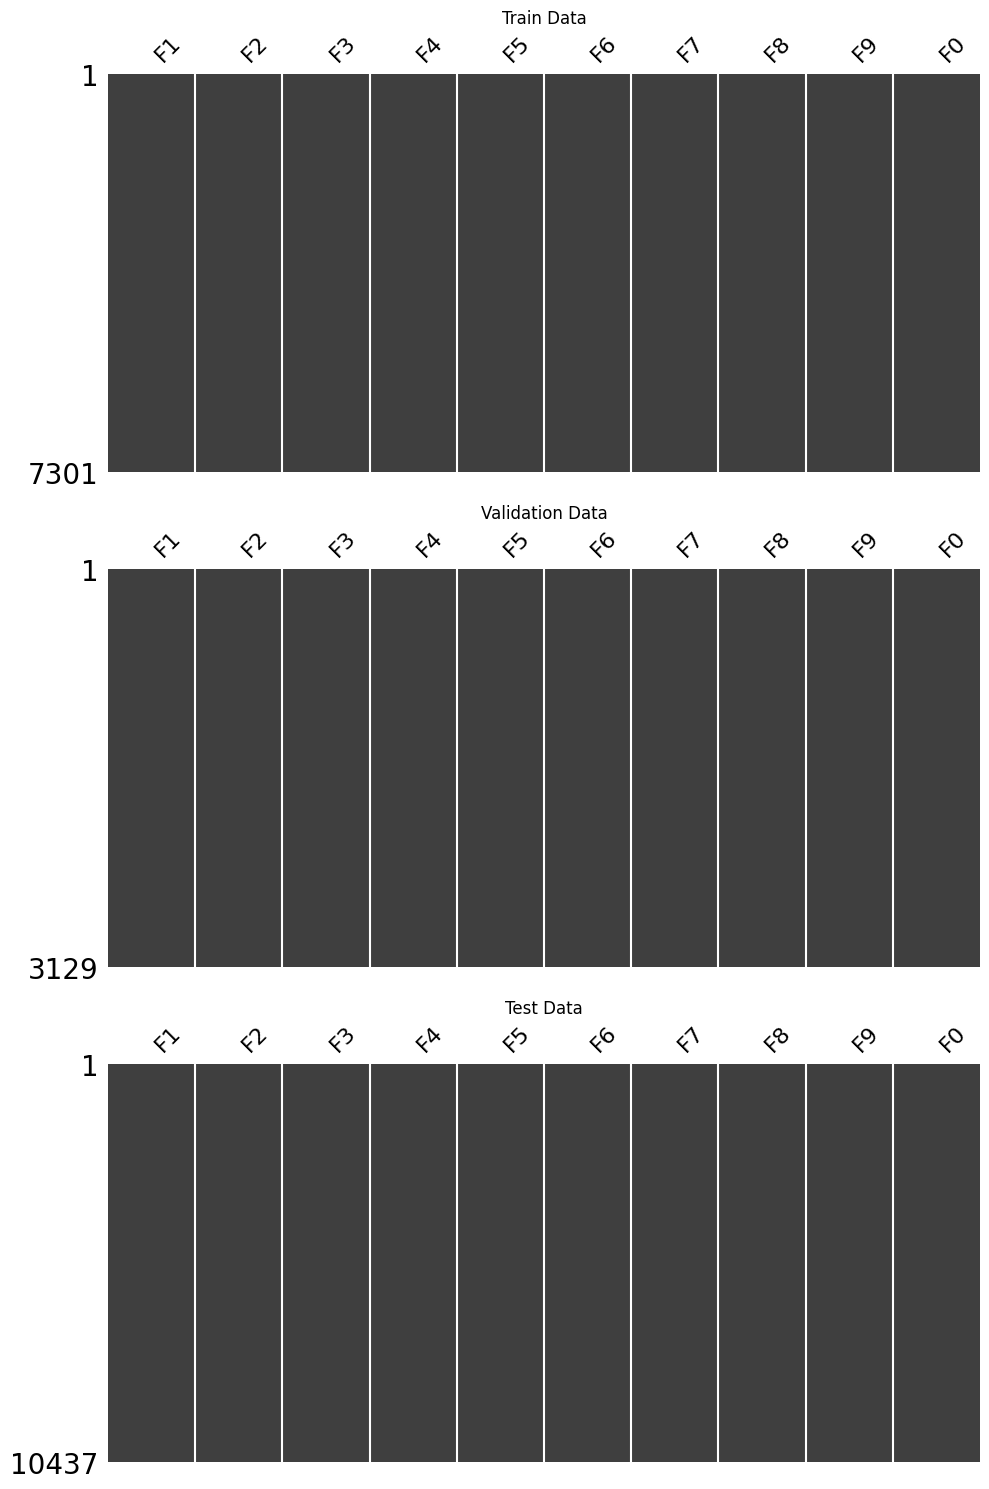

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10,15))  # 3 rows, 1 column

msno.matrix(train_data, ax=axs[0])
axs[0].set_title('Train Data')

msno.matrix(val_data, ax=axs[1])
axs[1].set_title('Validation Data')

msno.matrix(x_test.drop(['Unnamed: 0'],axis=1), ax=axs[2])
axs[2].set_title('Test Data')

plt.tight_layout()
plt.savefig('avila missing value visulization.jpg')
plt.show()


In [14]:
x_train_mapping_df=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/x_train_mapping_df.csv').drop(['Unnamed: 0'],axis=1)
x_val_mapping_df=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/x_val_mapping_df.csv').drop(['Unnamed: 0'],axis=1)
x_test_mapping_df=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/x_test_map_tail.csv').drop(['Unnamed: 0'],axis=1)


In [ ]:
tail_dict = {row['tail']: row.drop('tail').values.tolist() for index, row in tail_embedding.iterrows()}

train_notnull=[]
for i in range(len(x_train_mapping_df)):
    total_train_reltal=[]
    for j in x_train_mapping_df.columns:
        tailv=tail_dict.get(x_train_mapping_df.loc[i,j], [0]*16)
        total_train_reltal.append(tailv)

    train_notnull.append(total_train_reltal)
      

filename = '/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila_train_onlytail.pickle'
# open the file for writing in binary mode
with open(filename, 'wb') as f:
    # serialize the list and write it to the file
    pickle.dump(train_notnull, f)


In [ ]:
tail_dict = {row['tail']: row.drop('tail').values.tolist() for index, row in tail_embedding.iterrows()}

test_notnull=[]
for i in range(len(x_test_mapping_df)):
    total_test_reltal=[]
    for j in x_test_mapping_df.columns:
        tailv=tail_dict.get(x_test_mapping_df.loc[i,j], [0]*16)
        total_test_reltal.append(tailv)

    test_notnull.append(total_test_reltal)
      

filename = '/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila_test_onlytail.pickle'
# open the file for writing in binary mode
with open(filename, 'wb') as f:
    # serialize the list and write it to the file
    pickle.dump(test_notnull, f)



In [ ]:
tail_dict = {row['tail']: row.drop('tail').values.tolist() for index, row in tail_embedding.iterrows()}

val_notnull=[]
for i in range(len(x_val_mapping_df)):
    total_val_reltal=[]
    for j in x_val_mapping_df.columns:
        tailv=tail_dict.get(x_val_mapping_df.loc[i,j], [0]*16)
        total_val_reltal.append(tailv)

    val_notnull.append(total_val_reltal)
      

filename = '/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila_val_onlytail.pickle'
# open the file for writing in binary mode
with open(filename, 'wb') as f:
    # serialize the list and write it to the file
    pickle.dump(val_notnull, f)



In [ ]:
print(len(test_notnull))
print(len(test_notnull[0]))
print(len(test_notnull[0][0]))
print(len(train_notnull[0]))


10437
10
16
10


In [28]:
filename = '/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila_val_onlytail.pickle'
# open the file for writing in binary mode
with open(filename, 'rb') as f:
    # serialize the list and write it to the file
    val_tail_notnull=pickle.load(f)

trainfilename = '/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila_train_onlytail.pickle'
# open the file for writing in binary mode
with open(trainfilename, 'rb') as f:
    # serialize the list and write it to the file
    train_tail_notnull=pickle.load(f)

testfilename = '/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila_test_onlytail.pickle'
# open the file for writing in binary mode
with open(testfilename, 'rb') as f:
    # serialize the list and write it to the file
    test_tail_notnull=pickle.load(f)


in order to input train_data and val_data into xgboost(2-D data), flatten train_data and val_data


In [30]:

train_flatten = np.reshape(train_tail_notnull, (len(train_tail_notnull), 10*16))
val_flatten=np.reshape(val_tail_notnull, (len(val_tail_notnull), 10*16))
test_flatten = np.reshape(test_tail_notnull, (len(test_tail_notnull), 10*16))
print(train_flatten.shape)
print(val_flatten.shape)
print(test_flatten.shape)


(7301, 160)
(3129, 160)
(10437, 160)


In [31]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'class' is the column with classes
le = LabelEncoder()
y_test_labels=y_test.values.ravel().copy()
y_test_labels = le.fit_transform(y_test_labels)
y_train_labels=train_y.values.ravel().copy()
y_train_labels = le.fit_transform(y_train_labels)
y_train_labels

array([10,  0,  5, ...,  3,  5,  4])

In [32]:
len(y_train_labels)

7301

In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

param = {
    'objective': 'multi:softmax',
    'num_class': 12,
    'learning_rate': 0.1,  # Maybe try a slightly higher learning rate
    'max_depth': 12,  # Increase max_depth
    'subsample': 0.8,  # Add subsample
    'colsample_bytree': 0.8,  # Add colsample_bytree
    'min_child_weight': 1,  # Use min_child_weight
    'gamma': 0.1,  # Use gamma
}


# Convert input data to DMatrix format
dtrain = xgb.DMatrix(train_flatten,  label=y_train_labels)
dtest = xgb.DMatrix(test_flatten)

# Train the model
model = xgb.train(param, dtrain)

# Make predictions
preds = model.predict(dtest)

# Evaluate predictions
accuracy = accuracy_score(y_test_labels, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test_labels, preds))


Accuracy: 96.43%
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4286
           1       1.00      1.00      1.00         5
           2       0.97      0.97      0.97       103
           3       0.96      0.98      0.97       353
           4       0.96      0.97      0.97      1095
           5       0.97      0.92      0.95      1962
           6       1.00      0.99      0.99       447
           7       0.99      0.92      0.95       520
           8       1.00      0.98      0.99       832
           9       0.85      0.89      0.87        45
          10       0.97      0.94      0.95       522
          11       0.99      0.97      0.98       267

    accuracy                           0.96     10437
   macro avg       0.97      0.96      0.96     10437
weighted avg       0.96      0.96      0.96     10437



In [42]:
print(confusion_matrix(y_test_labels, preds))

[[4216    0    0    6   10   45    0    3    4    0    2    0]
 [   0    5    0    0    0    0    0    0    0    0    0    0]
 [   3    0  100    0    0    0    0    0    0    0    0    0]
 [   0    0    0  347    6    0    0    0    0    0    0    0]
 [  16    0    0    3 1060    9    0    0    0    0    6    1]
 [ 139    0    0    0    8 1810    1    4    0    0    0    0]
 [   5    0    0    0    0    0  442    0    0    0    0    0]
 [  37    0    3    0    0    0    0  480    0    0    0    0]
 [   9    0    0    0    0    0    0    0  816    7    0    0]
 [   5    0    0    0    0    0    0    0    0   40    0    0]
 [   6    0    0    6   16    2    0    0    0    0  490    2]
 [   2    0    0    0    0    0    0    0    0    0    7  258]]
